<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

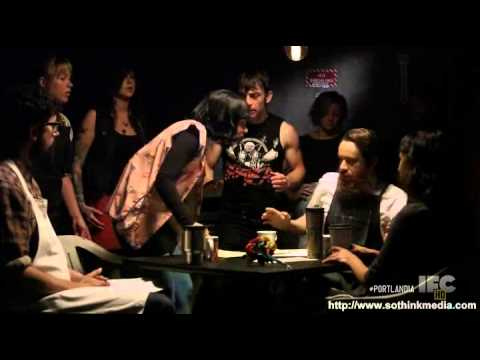

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [ ]:
%pwd

In [26]:
"""
Import Statements
"""

# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")
tokenizer = Tokenizer(nlp.vocab)

In [4]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [17]:
shops.coffee_shop_name.value_counts()[:20]

Epoch Coffee                       400
Halcyon                            300
The Factory - Cafe With a Soul     244
Houndstooth Coffee                 200
Venezia Italian Gelato             200
Caffé Medici                       143
Apanas Coffee & Beer               136
Kick Butt Coffee Music & Booze     100
Strange Brew, Austin Coffee        100
Arturo’s Underground Cafe          100
Caffe Medici                       100
Monkey Nest Coffee                 100
Flightpath Coffeehouse             100
The Buzz Mill                      100
Pacha                              100
Sorrento’s Coffee                  100
Cherrywood Coffeehouse             100
Bennu Coffee                       100
TOMS                               100
Dolce Neve                         100
Name: coffee_shop_name, dtype: int64

In [32]:
df = shops.copy()
df['coffee_shop_name'] = df['coffee_shop_name'].apply(lambda x: x.lower())
df.coffee_shop_name.value_counts()[:30]

epoch coffee                       400
halcyon                            300
the factory - cafe with a soul     244
venezia italian gelato             200
houndstooth coffee                 200
caffé medici                       143
apanas coffee & beer               136
lola savannah coffee lounge        100
patika                             100
sa-ten                             100
jo’s coffee                        100
quack’s 43rd street bakery         100
juan pelota                        100
teo                                100
alta’s cafe                        100
the hideout coffeehouse            100
summermoon coffee bar              100
cream whiskers                     100
bennu coffee                       100
corona coffee                      100
cherrywood coffeehouse             100
anderson’s coffee company          100
cuvée coffee bar                   100
dolce neve                         100
live oak market                    100
genuine joe              

In [73]:
df.full_review_text[4]

' 12/3/2016 1 check-in They are located within the Northcross mall shopping center facing east toward Burnet Rd with plenty of parking. I loved their computerized user friendly ordering system, it made it easy me to pick & choose all the items I wanted to try. I ordered pop tart, chicken & waffles, strawberry waffles (photos uploaded). This place is ideal for ordering a few dishes to share with your group. Seating is limited since this place is fairly new with lots of visitors. Arrive early and be prepared to wait a bit if you with a large grop. Store front facing Burnet Rd See all photos from Michelle A. for The Factory - Cafe With a Soul '

In [27]:
tokens = []

""" Make them tokens """
for doc in tokenizer.pipe(df['full_review_text'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

df['tokens'] = tokens

In [29]:
df['tokens'][:20]

0     [ , 11/25/2016, 1, check-in, Love, love, loved...
1     [ , 12/2/2016, Listed, in, Date, Night:, Austi...
2     [ , 11/30/2016, 1, check-in, Listed, in, Brunc...
3     [ , 11/25/2016, Very, cool, decor!, Good, drin...
4     [ , 12/3/2016, 1, check-in, They, are, located...
5     [ , 11/20/2016, 1, check-in, Very, cute, cafe!...
6     [ , 10/27/2016, 2, check-ins, Listed, in, "Nup...
7     [ , 11/2/2016, 2, check-ins, Love, this, place...
8     [ , 10/25/2016, 1, check-in, Ok,, let's, try, ...
9     [ , 11/10/2016, 3, check-ins, This, place, has...
10    [ , 10/22/2016, 1, check-in, Listed, in, Ameri...
11    [ , 11/20/2016, The, store, has, A+, decoratio...
12    [ , 11/17/2016, 1, check-in, Listed, in, 2016,...
13    [ , 12/5/2016, This, is, such, a, cute, little...
14    [ , 11/13/2016, Beautiful, eccentric, coffee, ...
15    [ , 11/9/2016, 1, check-in, Listed, in, In, Se...
16    [ , 11/6/2016, Really, love, the, atmosphere, ...
17    [ , 10/25/2016, 1, check-in, Check, out, t

In [33]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(df['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

df['tokens'] = tokens

In [34]:
df['tokens'][:20]

0     [ , 11/25/2016, 1, check-in, love, love, loved...
1     [ , 12/2/2016, listed, date, night:, austin,, ...
2     [ , 11/30/2016, 1, check-in, listed, brunch, s...
3     [ , 11/25/2016, cool, decor!, good, drinks, ni...
4     [ , 12/3/2016, 1, check-in, located, northcros...
5     [ , 11/20/2016, 1, check-in, cute, cafe!, thin...
6     [ , 10/27/2016, 2, check-ins, listed, "nuptial...
7     [ , 11/2/2016, 2, check-ins, love, place!,  , ...
8     [ , 10/25/2016, 1, check-in, ok,, let's, try, ...
9     [ , 11/10/2016, 3, check-ins, place, shown, so...
10    [ , 10/22/2016, 1, check-in, listed, americano...
11    [ , 11/20/2016, store, a+, decoration,, honest...
12    [ , 11/17/2016, 1, check-in, listed, 2016, tim...
13    [ , 12/5/2016, cute, little, cafe!, i've, driv...
14    [ , 11/13/2016, beautiful, eccentric, coffee, ...
15    [ , 11/9/2016, 1, check-in, listed, search, fa...
16    [ , 11/6/2016, love, atmosphere, here!, freque...
17    [ , 10/25/2016, 1, check-in, check, video,

In [37]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [40]:
wc = count(df['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
29,,7616,22606,1.0,0.053592,0.053592,1.000000
26,coffee,4210,8058,2.0,0.019103,0.072695,0.552784
136,place,3029,4264,3.0,0.010109,0.082803,0.397715
107,great,2438,3250,4.0,0.007705,0.090508,0.320116
241,it's,2061,3117,5.0,0.007389,0.097897,0.270614


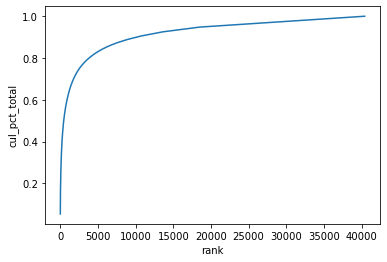

In [41]:
import seaborn as sns

# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [42]:
wc[wc['rank'] <= 20]['cul_pct_total'].max()

0.158392580704046

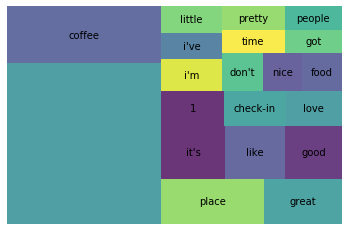

In [43]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [79]:
STOP_WORDS = nlp.Defaults.stop_words.union(['I', 'i', 'it', "it's", 'it.',
                                            'the', 'this', ' ', 'place', "i've",
                                            "i'm", '-', 'coffee', '1', 'coffee.',
                                            'check-in', 'coffee,'])

In [80]:
tokens = []

for doc in tokenizer.pipe(df['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
df['tokens'] = tokens

In [81]:
wc = count(df['tokens'])
wc.head(30)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
104,great,2438,3250,1.0,0.008652,0.008652,0.320116
176,like,2034,2902,2.0,0.007725,0.016377,0.267069
177,good,2084,2779,3.0,0.007398,0.023775,0.273634
21,love,1434,1806,4.0,0.004808,0.028583,0.188288
794,little,1230,1479,5.0,0.003937,0.032520,0.161502
380,don't,1133,1395,6.0,0.003714,0.036233,0.148766
157,nice,1188,1368,7.0,0.003642,0.039875,0.155987
469,food,1092,1363,8.0,0.003628,0.043503,0.143382
606,time,1099,1345,9.0,0.003580,0.047084,0.144301
28,pretty,1066,1339,10.0,0.003564,0.050648,0.139968


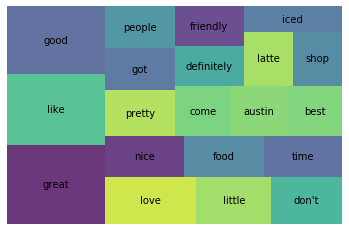

In [82]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [84]:
wc.shape

(40478, 7)

In [85]:
wc['appears_in_pct'].describe()

count    40478.000000
mean         0.001118
std          0.005901
min          0.000131
25%          0.000131
50%          0.000131
75%          0.000525
max          0.320116
Name: appears_in_pct, dtype: float64

C:\ProgramData\Anaconda3\envs\U4-S1-NLP\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


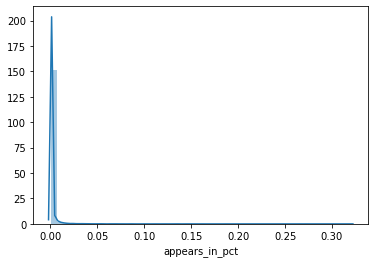

In [86]:
sns.distplot(wc['appears_in_pct']);

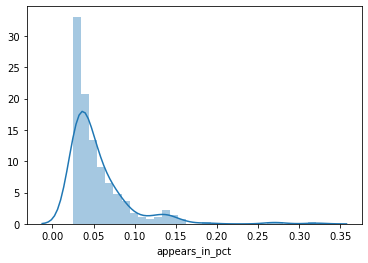

In [87]:
# Tree-Map w/ Words that appear in a least 2.5% of documents. 

wc = wc[wc['appears_in_pct'] >= 0.025]

sns.distplot(wc['appears_in_pct']);

In [88]:
wc.shape

(280, 7)

In [89]:
wc['appears_in_pct'].describe()

count    280.000000
mean       0.055462
std        0.038630
min        0.025079
25%        0.032136
50%        0.042345
75%        0.064338
max        0.320116
Name: appears_in_pct, dtype: float64

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [182]:
df.head()

,coffee_shop_name,full_review_text,star_rating,tokens
0,the factory - cafe with a soul,11/25/2016 1 check-in Love love loved the atm...,4.0,"[11/25/2016, love, love, loved, atmosphere!, c..."
1,the factory - cafe with a soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0,"[12/2/2016, listed, date, night:, austin,, amb..."
2,the factory - cafe with a soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0,"[11/30/2016, listed, brunch, spots, loved, ecl..."
3,the factory - cafe with a soul,11/25/2016 Very cool decor! Good drinks Nice ...,4.0,"[11/25/2016, cool, decor!, good, drinks, nice,..."
4,the factory - cafe with a soul,12/3/2016 1 check-in They are located within ...,4.0,"[12/3/2016, located, northcross, mall, shoppin..."


In [181]:
df['star_rating'][0].split(" ")[1]

IndexError: list index out of range

In [184]:
df.head()

,coffee_shop_name,full_review_text,star_rating,tokens
0,the factory - cafe with a soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,"[11/25/2016, love, love, loved, atmosphere!, c..."
1,the factory - cafe with a soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"[12/2/2016, listed, date, night:, austin,, amb..."
2,the factory - cafe with a soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,"[11/30/2016, listed, brunch, spots, loved, ecl..."
3,the factory - cafe with a soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,"[11/25/2016, cool, decor!, good, drinks, nice,..."
4,the factory - cafe with a soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,"[12/3/2016, located, northcross, mall, shoppin..."


In [187]:
i = 0
for row in df['star_rating']:
    
    df['star_rating'][i]
    print(df['star_rating'][i])

 5.0 star rating 
 5.0 star rating 
 5.0 star rating 
 5.0 star rating 
 5.0 star rating 
 5.0 star rating 
 5.0 star rating 
 5.0 star rating 
 5.0 star rating 
 5.0 star rating 
 5.0 star rating 
 5.0 star rating 
 5.0 star rating 
 5.0 star rating 
 5.0 star rating 
 5.0 star rating 
 5.0 star rating 
 5.0 star rating 
 5.0 star rating 
 5.0 star rating 
 5.0 star rating 
 5.0 star rating 
 5.0 star rating 
 5.0 star rating 
 5.0 star rating 
 5.0 star rating 
 5.0 star rating 
 5.0 star rating 
 5.0 star rating 
 5.0 star rating 
 5.0 star rating 
 5.0 star rating 
 5.0 star rating 
 5.0 star rating 
 5.0 star rating 
 5.0 star rating 
 5.0 star rating 
 5.0 star rating 
 5.0 star rating 
 5.0 star rating 
 5.0 star rating 
 5.0 star rating 
 5.0 star rating 
 5.0 star rating 
 5.0 star rating 
 5.0 star rating 
 5.0 star rating 
 5.0 star rating 
 5.0 star rating 
 5.0 star rating 
 5.0 star rating 
 5.0 star rating 
 5.0 star rating 
 5.0 star rating 
 5.0 star rating 
 5.0 star 

In [103]:
df.groupby('star_rating')

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

